# Face Detection with Haar Cascades

**Note: This is face *detection* NOT face *recognition*. We are only detecting if a face is in an image, not who the face actually is. That requires deep learning which we'll go over later!**

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import cv2 

## Images

In [10]:
waterfall = cv2.imread('Şelale.jpeg' , 0) # 0 is helping to get gray scale rather than RGB images.
xalo = cv2.imread('xalo ile foto.jpeg' , 0)
chess = cv2.imread('Satranç günü.jpeg' , 0)
with_girls = cv2.imread('Kızlarla foto.jpeg' , 0)

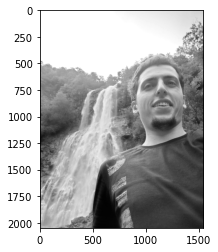

In [12]:
plt.imshow(waterfall , cmap = 'gray'); # Even if image is not RGB. We still need to cmap = 'gray' for see gray photos.

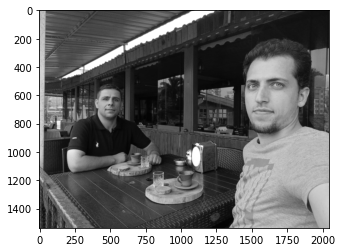

In [13]:
plt.imshow(xalo , cmap = 'gray');

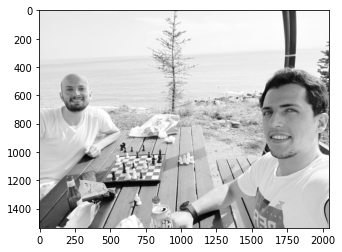

In [14]:
plt.imshow(chess , cmap = 'gray');

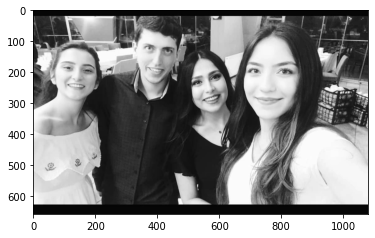

In [15]:
plt.imshow(with_girls , cmap = 'gray');

## Cascade Files

OpenCV comes with these pre-trained cascade files, we've relocated the .xml files for you in our own DATA folder.

## Face Detection

In [16]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [19]:
# face_cascade.detectMultiScale(chess)

array([[ 946,  188,   28,   28],
       [ 162,  479,  207,  207],
       [1495,  561,  427,  427],
       [1085,  581,  201,  201],
       [1015, 1038,   31,   31],
       [ 779,  993,   76,   76],
       [1202, 1134,   91,   91],
       [1338, 1456,   37,   37]], dtype=int32)

In [20]:
# face_cascade.detectMultiScale(chess).shape

(8, 4)

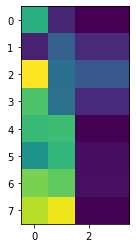

In [21]:
# plt.imshow(face_cascade.detectMultiScale(chess));

In [22]:
def detect_face(img):
  
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

In [24]:
chess_face = detect_face(chess)

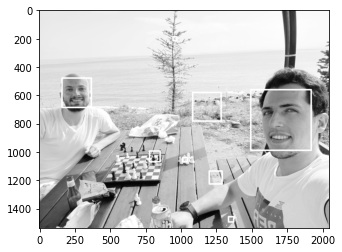

In [26]:
plt.imshow(chess_face , cmap = 'gray'); # Actually not good working.

In [27]:
xalo_face = detect_face(xalo)

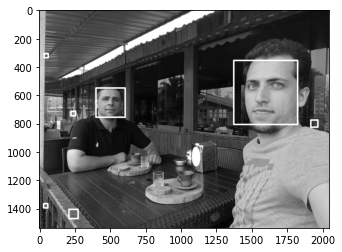

In [28]:
plt.imshow(xalo_face , cmap = 'gray'); # Working but not cool.

In [29]:
waterfall_face = detect_face(waterfall)

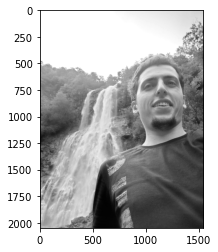

In [30]:
plt.imshow(waterfall , cmap = 'gray'); # Can't found the face.

In [31]:
with_girls_face = detect_face(with_girls)

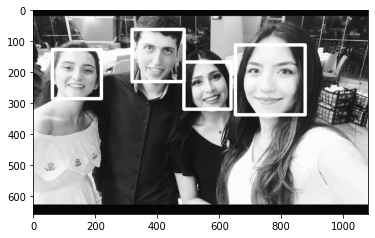

In [32]:
plt.imshow(with_girls_face , cmap = 'gray'); # Only this was good.

In [33]:
def adj_detect_face(img):
    
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor = 1.2, minNeighbors = 5) # Only differences are scaleFactor and minNeighbors parameters.
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img


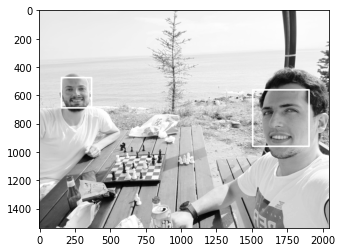

In [34]:
result = adj_detect_face(chess)
plt.imshow(result,cmap = 'gray'); # Now better.

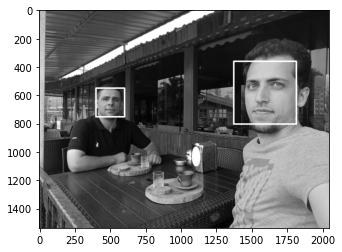

In [35]:
result = adj_detect_face(xalo)
plt.imshow(result,cmap = 'gray'); # Now better.

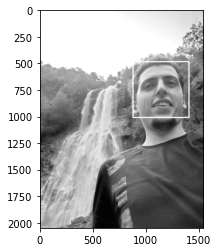

In [36]:
result = adj_detect_face(waterfall)
plt.imshow(result,cmap = 'gray'); # Whoaaa catched it now. Good...

## Eye Cascade File

In [37]:
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [38]:
def detect_eyes(img):
    
    face_img = img.copy()
  
    eyes = eye_cascade.detectMultiScale(face_img) 
    
    
    for (x,y,w,h) in eyes: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

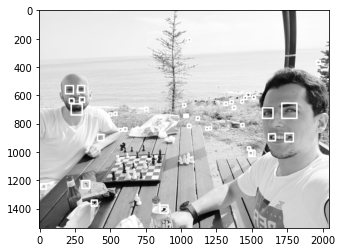

In [40]:
chess_eye = detect_eyes(chess)
plt.imshow(chess_eye , cmap = 'gray'); # Wrong too much.

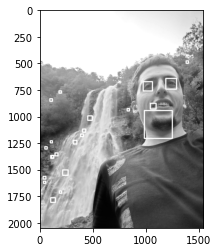

In [41]:
waterfall_eye = detect_eyes(waterfall)
plt.imshow(waterfall_eye , cmap = 'gray'); # Too bad.

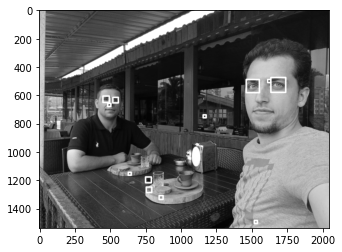

In [42]:
xalo_eye = detect_eyes(xalo)
plt.imshow(xalo_eye , cmap = 'gray'); # Its not too bad but still bad.

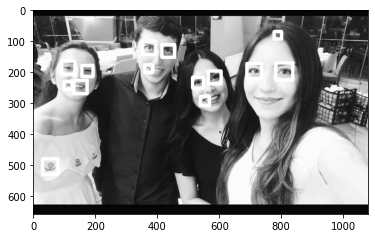

In [43]:
with_girls_eye = detect_eyes(with_girls)
plt.imshow(with_girls_eye , cmap = 'gray'); # Not too bad but bad.

In [46]:
def adj_detect_eyes(img):
    
    face_img = img.copy()
  
    eyes = eye_cascade.detectMultiScale(face_img , scaleFactor = 1.3 , minNeighbors = 5) 
    
    
    for (x,y,w,h) in eyes: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

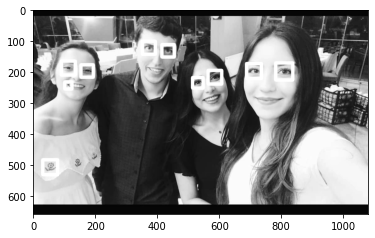

In [47]:
results = adj_detect_eyes(with_girls)
plt.imshow(results , cmap = 'gray'); # Now better but not proper.

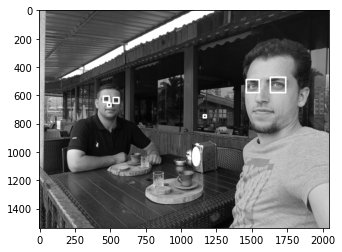

In [48]:
results = adj_detect_eyes(xalo)
plt.imshow(results , cmap = 'gray'); # Better but not fully OK.

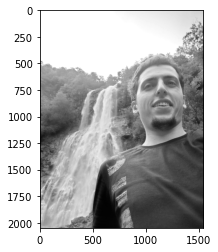

In [49]:
results = adj_detect_eyes(waterfall)
plt.imshow(results , cmap = 'gray');  # Still can't dedect.

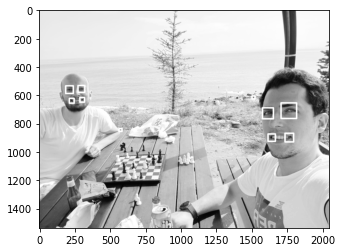

In [50]:
results = adj_detect_eyes(chess)
plt.imshow(results , cmap = 'gray');  # Still not good.

In [ ]:
# Done for now but Haarscades not working too good...

## Conjunction with Video

In [ ]:
# Later !.

In [ ]:
# Done